<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>


https://www.kaggle.com/c/santander-customer-satisfaction/data

# Data Load

In [2]:
import gdown
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def get_santan_dataset():
# https://drive.google.com/file/d/1oxHidcYjhx6HzOYMZ-l493nuz2AHpjz-/view?usp=sharing
#     https://drive.google.com/file/d/1rlN0N9wVQIKL1HMWvrH5I8y9jrqzZUpu/view?usp=sharing
    google_path = 'https://drive.google.com/uc?id='
    file_id_train = '1oxHidcYjhx6HzOYMZ-l493nuz2AHpjz-'
    file_id_test = '1rlN0N9wVQIKL1HMWvrH5I8y9jrqzZUpu'

    gdown.download(google_path+file_id_train,'santan_train.csv',quiet=False)
    gdown.download(google_path+file_id_test,'santan_test.csv',quiet=False)
    
    X = pd.read_csv('santan_train.csv')
    X_sub = pd.read_csv('santan_test.csv')
    y = X.iloc[:,[-1]]
    X = X.iloc[:,:-1]
    

    
    os.remove('santan_train.csv')
    os.remove('santan_test.csv')
    
    return X, y, X_sub

X, y, X_sub = get_santan_dataset()

Downloading...
From: https://drive.google.com/uc?id=1oxHidcYjhx6HzOYMZ-l493nuz2AHpjz-
To: C:\Users\N\OneDrive\WorkJ\Machine Learning\Kaggle\Santander Customer Satisfaction\santan_train.csv
59.4MB [00:03, 17.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rlN0N9wVQIKL1HMWvrH5I8y9jrqzZUpu
To: C:\Users\N\OneDrive\WorkJ\Machine Learning\Kaggle\Santander Customer Satisfaction\santan_test.csv
59.1MB [00:02, 23.2MB/s]


라이브러리 임포트

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.style.use(['seaborn-whitegrid'])

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 전처리

In [5]:
X

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [6]:
X['var3'].replace(-999999, 2, inplace=True)
X.drop('ID', axis=1, inplace=True)

X.shape

(76020, 369)

In [21]:
X

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


In [22]:
X.var3.describe()

count    76020.000000
mean         2.716483
std          9.447971
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    test_size=0.2, stratify=y )



stratify 는 안쓰는것이 더 좋은 결과를 가져온다. 

* 불균형 대이터여서 그런듯?! 나중에 깊게 생각해봐요

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    test_size=0.2 )



In [24]:
y_train.value_counts() / y_train.shape[0]

TARGET
0         0.960964
1         0.039036
dtype: float64

In [25]:
y_test.value_counts() / y_test.shape[0]

TARGET
0         0.9583
1         0.0417
dtype: float64

# XGBM 모델

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [27]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, eval_metric='auc',
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=100)

[0]	validation_0-auc:0.81157
[1]	validation_0-auc:0.82452
[2]	validation_0-auc:0.82746
[3]	validation_0-auc:0.82922
[4]	validation_0-auc:0.83298
[5]	validation_0-auc:0.83500
[6]	validation_0-auc:0.83653
[7]	validation_0-auc:0.83782
[8]	validation_0-auc:0.83802
[9]	validation_0-auc:0.83914
[10]	validation_0-auc:0.83954
[11]	validation_0-auc:0.83983
[12]	validation_0-auc:0.84033
[13]	validation_0-auc:0.84054
[14]	validation_0-auc:0.84135
[15]	validation_0-auc:0.84117
[16]	validation_0-auc:0.84101
[17]	validation_0-auc:0.84071
[18]	validation_0-auc:0.84052
[19]	validation_0-auc:0.84023
[20]	validation_0-auc:0.84012
[21]	validation_0-auc:0.84022
[22]	validation_0-auc:0.84007
[23]	validation_0-auc:0.84009
[24]	validation_0-auc:0.83974
[25]	validation_0-auc:0.84015
[26]	validation_0-auc:0.84101
[27]	validation_0-auc:0.84088
[28]	validation_0-auc:0.84074
[29]	validation_0-auc:0.83999
[30]	validation_0-auc:0.83959
[31]	validation_0-auc:0.83952
[32]	validation_0-auc:0.83901
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC Score : {0:.4f}'.format(xgb_roc_score))                    

ROC AUC Score : 0.8413


XGBM GridSearchCV로 파라미터 조정

In [31]:
from sklearn.model_selection import GridSearchCV

# 그리드 서치는 시간이 오래 걸리므로 n_estimators 를 100으로 감소
xgb_clf = XGBClassifier(n_estimators= 100)

param_grid = {'max_depth':[5, 7],
              'min_child_weight':[1, 3],
              'colsample_bytree':[0.5, 0.75]}

# cv 는 3으로~

grid_cv = GridSearchCV(xgb_clf,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1)

grid_cv.fit(X_train, y_train, early_stopping_rounds=30,
            eval_metric = 'auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.80839	validation_1-auc:0.80987
[1]	validation_0-auc:0.82568	validation_1-auc:0.82196
[2]	validation_0-auc:0.83339	validation_1-auc:0.82958
[3]	validation_0-auc:0.83698	validation_1-auc:0.83249
[4]	validation_0-auc:0.84250	validation_1-auc:0.83515
[5]	validation_0-auc:0.84330	validation_1-auc:0.83849
[6]	validation_0-auc:0.84276	validation_1-auc:0.83417
[7]	validation_0-auc:0.84840	validation_1-auc:0.83701
[8]	validation_0-auc:0.85092	validation_1-auc:0.83860
[9]	validation_0-auc:0.85093	validation_1-auc:0.83816
[10]	validation_0-auc:0.84973	validation_1-auc:0.83676
[11]	validation_0-auc:0.85002	validation_1-auc:0.83660
[12]	validation_0-auc:0.85677	validation_1-auc:0.84120
[13]	validation_0-auc:0.86055	validation_1-auc:0.84387
[14]	validation_0-auc:0.86262	validation_1-auc:0.84445
[15]	validation_0-auc:0.86474	validation_1-auc:0.84328
[16]	validation_0-auc:0.86581	validation_1-auc:0.84307
[17]	validation_0-auc:0.86725	validation_1-auc:0.84240
[18]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [32]:
grid_cv.best_params_

{'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}

In [33]:
xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1])
print('ROC AUC Score : {0:.4f}'.format(xgb_roc_score))                    

ROC AUC Score : 0.8445


XGBM 파라이퍼 수정
* GridSearchCV로 대략적인 하이퍼 파라미터를 정하고 섬세하게 다시 정의 해서 결과를 도출
    - otherwise takes too long to be excuted

## 세부조정 1
* n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
* {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3} by GridSearchCV

In [36]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156,
                        learning_rate=0.02, reg_alpha=0.03,
                        colsample_bytree=0.5, max_depth=5,
                        min_child_weight=3)

xgb_clf.fit(X_train, y_train, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=200)

[0]	validation_0-auc:0.72742	validation_1-auc:0.73391
[1]	validation_0-auc:0.80715	validation_1-auc:0.81071
[2]	validation_0-auc:0.80624	validation_1-auc:0.80581
[3]	validation_0-auc:0.80964	validation_1-auc:0.80898
[4]	validation_0-auc:0.80673	validation_1-auc:0.80736
[5]	validation_0-auc:0.81446	validation_1-auc:0.81287
[6]	validation_0-auc:0.81886	validation_1-auc:0.81845
[7]	validation_0-auc:0.82326	validation_1-auc:0.82152
[8]	validation_0-auc:0.82781	validation_1-auc:0.82588
[9]	validation_0-auc:0.82420	validation_1-auc:0.82216
[10]	validation_0-auc:0.82748	validation_1-auc:0.82432
[11]	validation_0-auc:0.82418	validation_1-auc:0.82284
[12]	validation_0-auc:0.82709	validation_1-auc:0.82502
[13]	validation_0-auc:0.82475	validation_1-auc:0.82316
[14]	validation_0-auc:0.82757	validation_1-auc:0.82608
[15]	validation_0-auc:0.82537	validation_1-auc:0.82406
[16]	validation_0-auc:0.82752	validation_1-auc:0.82571
[17]	validation_0-auc:0.82567	validation_1-auc:0.82424
[18]	validation_0-au

[149]	validation_0-auc:0.85210	validation_1-auc:0.84037
[150]	validation_0-auc:0.85198	validation_1-auc:0.84042
[151]	validation_0-auc:0.85241	validation_1-auc:0.84053
[152]	validation_0-auc:0.85273	validation_1-auc:0.84066
[153]	validation_0-auc:0.85309	validation_1-auc:0.84080
[154]	validation_0-auc:0.85301	validation_1-auc:0.84083
[155]	validation_0-auc:0.85294	validation_1-auc:0.84065
[156]	validation_0-auc:0.85295	validation_1-auc:0.84057
[157]	validation_0-auc:0.85325	validation_1-auc:0.84085
[158]	validation_0-auc:0.85354	validation_1-auc:0.84108
[159]	validation_0-auc:0.85350	validation_1-auc:0.84102
[160]	validation_0-auc:0.85339	validation_1-auc:0.84076
[161]	validation_0-auc:0.85351	validation_1-auc:0.84071
[162]	validation_0-auc:0.85357	validation_1-auc:0.84071
[163]	validation_0-auc:0.85357	validation_1-auc:0.84060
[164]	validation_0-auc:0.85399	validation_1-auc:0.84070
[165]	validation_0-auc:0.85397	validation_1-auc:0.84059
[166]	validation_0-auc:0.85400	validation_1-auc:

[296]	validation_0-auc:0.87083	validation_1-auc:0.84592
[297]	validation_0-auc:0.87097	validation_1-auc:0.84586
[298]	validation_0-auc:0.87098	validation_1-auc:0.84585
[299]	validation_0-auc:0.87103	validation_1-auc:0.84590
[300]	validation_0-auc:0.87106	validation_1-auc:0.84586
[301]	validation_0-auc:0.87116	validation_1-auc:0.84589
[302]	validation_0-auc:0.87118	validation_1-auc:0.84589
[303]	validation_0-auc:0.87125	validation_1-auc:0.84590
[304]	validation_0-auc:0.87131	validation_1-auc:0.84587
[305]	validation_0-auc:0.87138	validation_1-auc:0.84587
[306]	validation_0-auc:0.87143	validation_1-auc:0.84583
[307]	validation_0-auc:0.87146	validation_1-auc:0.84579
[308]	validation_0-auc:0.87154	validation_1-auc:0.84579
[309]	validation_0-auc:0.87160	validation_1-auc:0.84580
[310]	validation_0-auc:0.87165	validation_1-auc:0.84576
[311]	validation_0-auc:0.87168	validation_1-auc:0.84574
[312]	validation_0-auc:0.87172	validation_1-auc:0.84575
[313]	validation_0-auc:0.87179	validation_1-auc:

[443]	validation_0-auc:0.87869	validation_1-auc:0.84519
[444]	validation_0-auc:0.87873	validation_1-auc:0.84518
[445]	validation_0-auc:0.87879	validation_1-auc:0.84518
[446]	validation_0-auc:0.87882	validation_1-auc:0.84520
[447]	validation_0-auc:0.87886	validation_1-auc:0.84518
[448]	validation_0-auc:0.87887	validation_1-auc:0.84518
[449]	validation_0-auc:0.87895	validation_1-auc:0.84516
[450]	validation_0-auc:0.87900	validation_1-auc:0.84513
[451]	validation_0-auc:0.87904	validation_1-auc:0.84513
[452]	validation_0-auc:0.87911	validation_1-auc:0.84514
[453]	validation_0-auc:0.87916	validation_1-auc:0.84515
[454]	validation_0-auc:0.87919	validation_1-auc:0.84508
[455]	validation_0-auc:0.87923	validation_1-auc:0.84505
[456]	validation_0-auc:0.87925	validation_1-auc:0.84506
[457]	validation_0-auc:0.87932	validation_1-auc:0.84504
[458]	validation_0-auc:0.87935	validation_1-auc:0.84505
[459]	validation_0-auc:0.87942	validation_1-auc:0.84503
[460]	validation_0-auc:0.87945	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              random_state=156, reg_alpha=0.03, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [37]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC Score : {0:.4f}'.format(xgb_roc_score))                    

ROC AUC Score : 0.8463


## 세부조정 2
* n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
* {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1} by 공룡책

In [38]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156,
                        learning_rate=0.02, reg_alpha=0.03,
                        colsample_bytree=0.75, max_depth=7,
                        min_child_weight=1)

xgb_clf.fit(X_train, y_train, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=200)

[0]	validation_0-auc:0.73501	validation_1-auc:0.74128
[1]	validation_0-auc:0.82359	validation_1-auc:0.81776
[2]	validation_0-auc:0.81094	validation_1-auc:0.80194
[3]	validation_0-auc:0.81288	validation_1-auc:0.80637
[4]	validation_0-auc:0.82564	validation_1-auc:0.81831
[5]	validation_0-auc:0.83066	validation_1-auc:0.82196
[6]	validation_0-auc:0.83608	validation_1-auc:0.82734
[7]	validation_0-auc:0.83832	validation_1-auc:0.82902
[8]	validation_0-auc:0.84104	validation_1-auc:0.83114
[9]	validation_0-auc:0.84000	validation_1-auc:0.83020
[10]	validation_0-auc:0.84155	validation_1-auc:0.83071
[11]	validation_0-auc:0.84090	validation_1-auc:0.82996
[12]	validation_0-auc:0.84176	validation_1-auc:0.83039
[13]	validation_0-auc:0.83971	validation_1-auc:0.82909
[14]	validation_0-auc:0.84151	validation_1-auc:0.83008
[15]	validation_0-auc:0.84436	validation_1-auc:0.83231
[16]	validation_0-auc:0.84481	validation_1-auc:0.83256
[17]	validation_0-auc:0.84456	validation_1-auc:0.83193
[18]	validation_0-au

[149]	validation_0-auc:0.88004	validation_1-auc:0.84340
[150]	validation_0-auc:0.88031	validation_1-auc:0.84355
[151]	validation_0-auc:0.88060	validation_1-auc:0.84368
[152]	validation_0-auc:0.88084	validation_1-auc:0.84378
[153]	validation_0-auc:0.88104	validation_1-auc:0.84380
[154]	validation_0-auc:0.88125	validation_1-auc:0.84384
[155]	validation_0-auc:0.88149	validation_1-auc:0.84387
[156]	validation_0-auc:0.88158	validation_1-auc:0.84388
[157]	validation_0-auc:0.88186	validation_1-auc:0.84398
[158]	validation_0-auc:0.88210	validation_1-auc:0.84413
[159]	validation_0-auc:0.88229	validation_1-auc:0.84415
[160]	validation_0-auc:0.88256	validation_1-auc:0.84416
[161]	validation_0-auc:0.88288	validation_1-auc:0.84411
[162]	validation_0-auc:0.88301	validation_1-auc:0.84393
[163]	validation_0-auc:0.88313	validation_1-auc:0.84387
[164]	validation_0-auc:0.88341	validation_1-auc:0.84398
[165]	validation_0-auc:0.88367	validation_1-auc:0.84393
[166]	validation_0-auc:0.88396	validation_1-auc:

[296]	validation_0-auc:0.90501	validation_1-auc:0.84358
[297]	validation_0-auc:0.90509	validation_1-auc:0.84353
[298]	validation_0-auc:0.90521	validation_1-auc:0.84359
[299]	validation_0-auc:0.90528	validation_1-auc:0.84360
[300]	validation_0-auc:0.90535	validation_1-auc:0.84360
[301]	validation_0-auc:0.90539	validation_1-auc:0.84356
[302]	validation_0-auc:0.90546	validation_1-auc:0.84351
[303]	validation_0-auc:0.90551	validation_1-auc:0.84354
[304]	validation_0-auc:0.90556	validation_1-auc:0.84352
[305]	validation_0-auc:0.90565	validation_1-auc:0.84349
[306]	validation_0-auc:0.90583	validation_1-auc:0.84348
[307]	validation_0-auc:0.90587	validation_1-auc:0.84351
[308]	validation_0-auc:0.90594	validation_1-auc:0.84350
[309]	validation_0-auc:0.90599	validation_1-auc:0.84340
[310]	validation_0-auc:0.90607	validation_1-auc:0.84342
[311]	validation_0-auc:0.90628	validation_1-auc:0.84340
[312]	validation_0-auc:0.90634	validation_1-auc:0.84342
[313]	validation_0-auc:0.90647	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              random_state=156, reg_alpha=0.03, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [39]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC Score : {0:.4f}'.format(xgb_roc_score))                    

ROC AUC Score : 0.8453


* 공룡책에서보다 GridSearch CV가 찾은 값이 소폭 높게 나옮

# 시각화

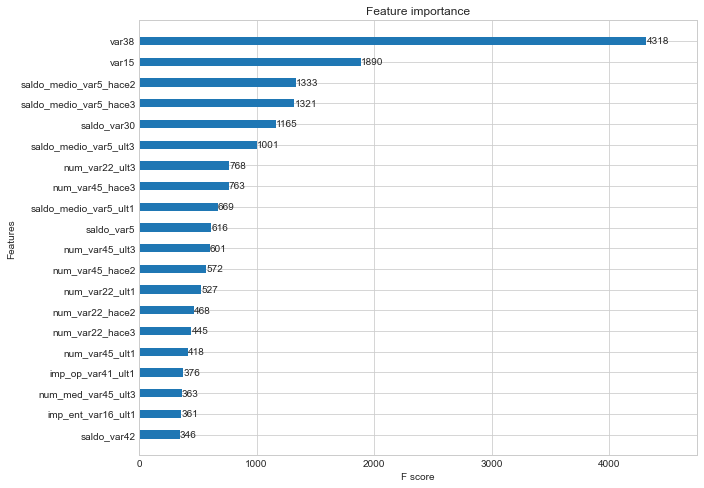

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(1, 1 , figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4);

# LightGBM

In [45]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, 
             eval_metric='auc',eval_set=evals, verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

LGBMClassifier(n_estimators=500)

In [46]:
lgbm_roc_score = roc_auc_score(y_test, 
                               lgbm_clf.predict_proba(X_test)[:, 1], 
                               average='macro')

print('LGBM ROC AUC Score {:.4f}'.format(lgbm_roc_score))

LGBM ROC AUC Score 0.8409


LGBM GridsearchCv

In [47]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

param_grid = {'num_leaves': [32, 64],
              'max_depth':[128, 160],
              'min_child_samples': [60, 100],
              'subsample':[0.8, 1]}

evals = [(X_train, y_train), (X_test, y_test)]

grid_cv = GridSearchCV(lgbm_clf, param_grid=param_grid,
                       cv=3,
                       n_jobs=-1)
grid_cv.fit(X_train, y_train, eval_set= evals,
            eval_metric='auc', early_stopping_rounds=100)

[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.828798	training's binary_logloss: 0.150959	valid_1's auc: 0.822075	valid_1's binary_logloss: 0.159734
[3]	training's auc: 0.839609	training's binary_logloss: 0.147147	valid_1's auc: 0.829436	valid_1's binary_logloss: 0.156119
[4]	training's auc: 0.845158	training's binary_logloss: 0.144107	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.153073
[5]	training's auc: 0.847711	training's binary_logloss: 0.14162	valid_1's auc: 0.839041	valid_1's binary_logloss: 0.150773
[6]	training's auc: 0.849184	training's binary_logloss: 0.139622	valid_1's auc: 0.839076	valid_1's binary_logloss: 0.148948
[7]	training's auc: 0.85094	training's binary_logloss: 0.13786	valid_1's auc: 0.839943	valid_1's binary_logloss: 0.147346
[8]	training's auc: 0.853386	training's binary_logloss: 0.136418	valid_1'

[67]	training's auc: 0.904205	training's binary_logloss: 0.115153	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.1393
[68]	training's auc: 0.904809	training's binary_logloss: 0.114934	valid_1's auc: 0.837746	valid_1's binary_logloss: 0.13934
[69]	training's auc: 0.90534	training's binary_logloss: 0.114725	valid_1's auc: 0.837685	valid_1's binary_logloss: 0.139328
[70]	training's auc: 0.905874	training's binary_logloss: 0.11454	valid_1's auc: 0.837589	valid_1's binary_logloss: 0.139355
[71]	training's auc: 0.906391	training's binary_logloss: 0.114376	valid_1's auc: 0.837816	valid_1's binary_logloss: 0.139335
[72]	training's auc: 0.906693	training's binary_logloss: 0.114252	valid_1's auc: 0.837883	valid_1's binary_logloss: 0.139324
[73]	training's auc: 0.906992	training's binary_logloss: 0.114088	valid_1's auc: 0.837614	valid_1's binary_logloss: 0.139416
[74]	training's auc: 0.907309	training's binary_logloss: 0.113933	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.139416
[75]	

GridSearchCV(cv=3, estimator=LGBMClassifier(n_estimators=200), n_jobs=-1,
             param_grid={'max_depth': [128, 160],
                         'min_child_samples': [60, 100], 'num_leaves': [32, 64],
                         'subsample': [0.8, 1]})

In [48]:
grid_cv.best_params_

{'max_depth': 128,
 'min_child_samples': 100,
 'num_leaves': 32,
 'subsample': 0.8}

In [49]:
lgbm_roc_score = roc_auc_score(y_test, 
                               grid_cv.predict_proba(X_test)[:, 1], 
                               average='macro')

print('LGBM ROC AUC Score {:.4f}'.format(lgbm_roc_score))

LGBM ROC AUC Score 0.8417


LGBM 모델 재수행 by GridsearchCV result

* n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
* `{'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}`

In [54]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, learning_rate=0.02,
                          reg_alpha=0.03,max_depth=128,
                          min_child_samples= 100, num_leaves=32,
                          subsample=0.8)

evals = [(X_train, y_train), (X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=200, 
             eval_metric='auc',eval_set=evals, verbose=True)

[1]	training's auc: 0.824957	training's binary_logloss: 0.163053	valid_1's auc: 0.818879	valid_1's binary_logloss: 0.171659
Training until validation scores don't improve for 200 rounds
[2]	training's auc: 0.826081	training's binary_logloss: 0.161398	valid_1's auc: 0.82005	valid_1's binary_logloss: 0.170051
[3]	training's auc: 0.827682	training's binary_logloss: 0.15989	valid_1's auc: 0.820747	valid_1's binary_logloss: 0.16858
[4]	training's auc: 0.829624	training's binary_logloss: 0.158506	valid_1's auc: 0.822509	valid_1's binary_logloss: 0.167212
[5]	training's auc: 0.82999	training's binary_logloss: 0.157232	valid_1's auc: 0.822754	valid_1's binary_logloss: 0.165991
[6]	training's auc: 0.830251	training's binary_logloss: 0.156059	valid_1's auc: 0.822974	valid_1's binary_logloss: 0.164812
[7]	training's auc: 0.833495	training's binary_logloss: 0.154954	valid_1's auc: 0.824938	valid_1's binary_logloss: 0.163759
[8]	training's auc: 0.834462	training's binary_logloss: 0.153926	valid_1's

[80]	training's auc: 0.86436	training's binary_logloss: 0.129539	valid_1's auc: 0.842665	valid_1's binary_logloss: 0.14094
[81]	training's auc: 0.864616	training's binary_logloss: 0.129415	valid_1's auc: 0.842429	valid_1's binary_logloss: 0.140894
[82]	training's auc: 0.864796	training's binary_logloss: 0.129286	valid_1's auc: 0.842571	valid_1's binary_logloss: 0.140823
[83]	training's auc: 0.864987	training's binary_logloss: 0.129168	valid_1's auc: 0.842561	valid_1's binary_logloss: 0.140766
[84]	training's auc: 0.865108	training's binary_logloss: 0.129055	valid_1's auc: 0.842497	valid_1's binary_logloss: 0.14071
[85]	training's auc: 0.86536	training's binary_logloss: 0.128942	valid_1's auc: 0.842502	valid_1's binary_logloss: 0.140646
[86]	training's auc: 0.865685	training's binary_logloss: 0.128822	valid_1's auc: 0.84256	valid_1's binary_logloss: 0.140588
[87]	training's auc: 0.86605	training's binary_logloss: 0.128701	valid_1's auc: 0.842668	valid_1's binary_logloss: 0.140513
[88]	t

[153]	training's auc: 0.87978	training's binary_logloss: 0.123441	valid_1's auc: 0.8421	valid_1's binary_logloss: 0.138832
[154]	training's auc: 0.879912	training's binary_logloss: 0.123378	valid_1's auc: 0.842163	valid_1's binary_logloss: 0.138819
[155]	training's auc: 0.880225	training's binary_logloss: 0.123314	valid_1's auc: 0.842262	valid_1's binary_logloss: 0.138802
[156]	training's auc: 0.88041	training's binary_logloss: 0.123259	valid_1's auc: 0.842186	valid_1's binary_logloss: 0.138801
[157]	training's auc: 0.880735	training's binary_logloss: 0.123192	valid_1's auc: 0.842232	valid_1's binary_logloss: 0.13879
[158]	training's auc: 0.880872	training's binary_logloss: 0.123131	valid_1's auc: 0.842194	valid_1's binary_logloss: 0.138793
[159]	training's auc: 0.881141	training's binary_logloss: 0.123069	valid_1's auc: 0.842261	valid_1's binary_logloss: 0.138779
[160]	training's auc: 0.881368	training's binary_logloss: 0.123007	valid_1's auc: 0.842217	valid_1's binary_logloss: 0.1387

[220]	training's auc: 0.890904	training's binary_logloss: 0.119861	valid_1's auc: 0.84245	valid_1's binary_logloss: 0.138487
[221]	training's auc: 0.891044	training's binary_logloss: 0.119809	valid_1's auc: 0.842419	valid_1's binary_logloss: 0.138485
[222]	training's auc: 0.891188	training's binary_logloss: 0.119758	valid_1's auc: 0.842348	valid_1's binary_logloss: 0.138495
[223]	training's auc: 0.89137	training's binary_logloss: 0.119707	valid_1's auc: 0.842314	valid_1's binary_logloss: 0.138496
[224]	training's auc: 0.891494	training's binary_logloss: 0.119668	valid_1's auc: 0.842312	valid_1's binary_logloss: 0.138501
[225]	training's auc: 0.891629	training's binary_logloss: 0.119621	valid_1's auc: 0.842325	valid_1's binary_logloss: 0.138498
[226]	training's auc: 0.891766	training's binary_logloss: 0.119583	valid_1's auc: 0.842289	valid_1's binary_logloss: 0.138498
[227]	training's auc: 0.891894	training's binary_logloss: 0.119539	valid_1's auc: 0.842301	valid_1's binary_logloss: 0.1

LGBMClassifier(learning_rate=0.02, max_depth=128, min_child_samples=100,
               n_estimators=1000, num_leaves=32, reg_alpha=0.03, subsample=0.8)

In [55]:
lgbm_roc_score = roc_auc_score(y_test, 
                               lgbm_clf.predict_proba(X_test)[:, 1], 
                               average='macro')

print('LGBM ROC AUC Score {:.4f}'.format(lgbm_roc_score))

LGBM ROC AUC Score 0.8430


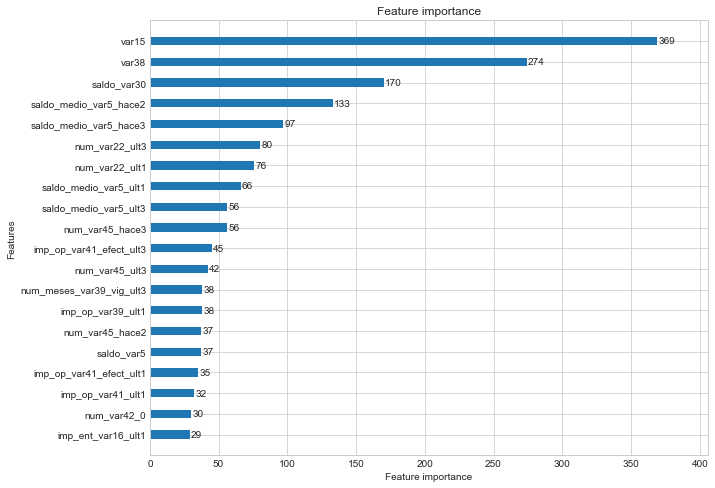

In [56]:
from lightgbm import plot_importance

fix, ax = plt.subplots(1, 1 , figsize=(10, 8))
plot_importance(lgbm_clf, ax=ax, max_num_features=20, height=0.4);

**Reference**

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>

* 파이썬 머신러닝 완벽 가이드, 권철민